# Core model

### 1- Classical ML approach

In [ ]:
import pandas as pd
import re
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
# import arabic_reshaper
import nltk
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB,ComplementNB,MultinomialNB,BernoulliNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report
from time import time
# import arabicnlp 

In [ ]:
def train_predict(classifier,X_train,y_train,X_test,y_test, average= 'macro'): 
    '''

    inputs:
       - classifier: the learning algorithm to be trained and predicted on
       - x_train  : train set Features
       - y_train  : train set Labels
       - x_test   : test set Features
       - y_train  : test set Labels
 
    '''
    
    results = {}
    
    # Fit the classifier to the training data and Calculate the time
    start_train = time()
    classifier = classifier.fit(X_train, y_train)
    end_train = time()
    results['train_time'] = round((end_train-start_train), 2)

    # Predict the training/testing labels and Calculate the time
    start_test = time()
    y_pred_train = classifier.predict(X_train)
    y_pred_test = classifier.predict(X_test)
    end_test = time()   
    results['pred_time'] = round((end_test-start_test), 2)
            
    # Model evaluation (training/testing data) using accuracy
    results['acc_train'] = round(accuracy_score(y_train, y_pred_train), 2)
    results['acc_test'] = round(accuracy_score(y_test, y_pred_test), 2)
    
    # Model evaluation (training/testing data) using f1-score
    results['f1_train'] = round(f1_score(y_train, y_pred_train, average= average), 2)
    results['f1_test'] = round(f1_score(y_test, y_pred_test, average= average), 2)
    
    # Display classification_report
    report = classification_report(y_test, y_pred_test)
       
    
    # Return the results
    return results, report

In [ ]:
from sklearn.model_selection import train_test_split

X=FULL_DATA['Full_name'].values.tolist()
y=pd.get_dummies(FULL_DATA['label'].values)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1)


In [ ]:
cv = CountVectorizer(binary=False,
                     max_features=1500000,
                    #  min_df=2
                     )
cv.fit(x_train)
print("vocabulary : ",len(cv.vocabulary_))

vocabulary :  559591


In [ ]:
# cv.vocabulary_

In [ ]:
x_train_cv = cv.transform(x_train)
x_test_cv = cv.transform(x_test) 

In [ ]:
clf_MNB = 
labels = ['f1_train', 'f1_test']
y_label = 'F1_Score'
title = 'Train/Test F1_Score per Classifier'
eval_plot(labels, y_label, title)
     ()
clf_LR = LogisticRegression()
clf_SVM=SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42,
                      # max_iter=100,
                      tol=None)
clf_list = [ clf_MNB, clf_LR, clf_SVM]

# Compare evaluation of the different classifiers
clf_evaluation = {}
clf_report = {}

for clf in clf_list:
    clf_evaluation[clf.__class__.__name__], clf_report[clf.__class__.__name__] = train_predict(clf,
                                                                                              x_train_cv,
                                                                                              np.argmax(y_train.to_numpy(), axis=1),
                                                                                              x_test_cv,
                                                                                              np.argmax(y_test.to_numpy(), axis=1)
                                                                                              )
    print(clf_evaluation )

{'MultinomialNB': {'train_time': 0.38, 'pred_time': 0.21, 'acc_train': 0.96, 'acc_test': 0.83, 'f1_train': 0.96, 'f1_test': 0.82}}
{'MultinomialNB': {'train_time': 0.38, 'pred_time': 0.21, 'acc_train': 0.96, 'acc_test': 0.83, 'f1_train': 0.96, 'f1_test': 0.82}, 'LogisticRegression': {'train_time': 35.02, 'pred_time': 0.07, 'acc_train': 1.0, 'acc_test': 1.0, 'f1_train': 1.0, 'f1_test': 1.0}}
{'MultinomialNB': {'train_time': 0.38, 'pred_time': 0.21, 'acc_train': 0.96, 'acc_test': 0.83, 'f1_train': 0.96, 'f1_test': 0.82}, 'LogisticRegression': {'train_time': 35.02, 'pred_time': 0.07, 'acc_train': 1.0, 'acc_test': 1.0, 'f1_train': 1.0, 'f1_test': 1.0}, 'SGDClassifier': {'train_time': 436.35, 'pred_time': 0.04, 'acc_train': 0.95, 'acc_test': 0.95, 'f1_train': 0.95, 'f1_test': 0.95}}


In [ ]:
clf_evaluation

{'MultinomialNB': {'train_time': 0.38,
  'pred_time': 0.21,
  'acc_train': 0.96,
  'acc_test': 0.83,
  'f1_train': 0.96,
  'f1_test': 0.82},
 'LogisticRegression': {'train_time': 35.02,
  'pred_time': 0.07,
  'acc_train': 1.0,
  'acc_test': 1.0,
  'f1_train': 1.0,
  'f1_test': 1.0},
 'SGDClassifier': {'train_time': 436.35,
  'pred_time': 0.04,
  'acc_train': 0.95,
  'acc_test': 0.95,
  'f1_train': 0.95,
  'f1_test': 0.95}}

In [ ]:
legend = []
for i in range(len(clf_list)):
    legend.append(clf_list[i].__class__.__name__)
    
def eval_plot(labels, y_label, title):

    clf1 = [clf_evaluation[legend[0]][labels[0]], clf_evaluation[legend[0]][labels[1]]]
    clf2 = [clf_evaluation[legend[1]][labels[0]], clf_evaluation[legend[1]][labels[1]]]
    clf3 = [clf_evaluation[legend[2]][labels[0]], clf_evaluation[legend[2]][labels[1]]]

    x = np.arange(len(labels))  # the label locations
    width = 0.2  # the width of the bars

    fig, ax = plt.subplots()
    ax.bar(x - width/2, clf1, width, label=legend[0])
    ax.bar(x + width/2, clf2, width, label=legend[1])
    ax.bar(x + width*3/2, clf3, width, label=legend[2])

    # Add labels, title, and legend
    ax.set_ylabel(y_label)
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    # Add bars annotation
    for i in ax.patches:
        # get_x pulls left or right; get_height pushes up or down
        ax.text(i.get_x()+(width/2), i.get_height()+0.01,
                str(i.get_height()), fontsize=11,
                color='black', ha='center')

    plt.show()

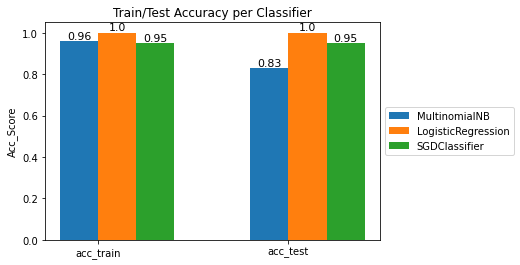

In [ ]:
labels = ['acc_train', 'acc_test']
y_label = 'Acc_Score'
title = 'Train/Test Accuracy per Classifier'
eval_plot(labels, y_label, title)

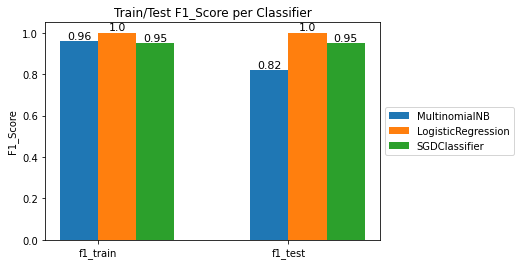

In [ ]:

labels = ['f1_train', 'f1_test']
y_label = 'F1_Score'
title = 'Train/Test F1_Score per Classifier'
eval_plot(labels, y_label, title)
     

### 2- Deep Learning Approach

In [23]:
import pandas as pd
import numpy as np
import os
import re
from tqdm import tqdm
import matplotlib.pyplot as plt
import csv

%matplotlib inline

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [5]:
FULL_DATA = pd.read_csv("/content/FULL_DATA.csv")

In [37]:
FULL_DATA.drop('Unnamed: 0',axis=1,inplace=True)

In [42]:
FULL_DATA.dropna(inplace=True)

In [45]:
FULL_DATA['label'] = FULL_DATA['label'].astype(int)

In [47]:
FULL_DATA.head()

,Full_name,label
0,غنيم باسم شريت,1
1,منار عمار وفيق,0
2,بسيمةشساجعشفخاح,1
3,ذهم قتادة فوزي,1
4,صودهفائزهنقذ,1


In [48]:
X=FULL_DATA.Full_name.values
y=FULL_DATA.label.values

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [50]:
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.1, random_state=2022)

In [11]:
import torch

if torch.cuda.is_available():       
    device = torch.device("cuda")
    print(f'There are {torch.cuda.device_count()} GPU(s) available.')
    print('Device name:', torch.cuda.get_device_name(0))

else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
Device name: Tesla T4


In [16]:
# !pip install transformers

In [14]:
from transformers import AutoTokenizer, AutoModel

In [15]:
tokenizer = AutoTokenizer.from_pretrained("asafaya/bert-mini-arabic")

Downloading:   0%|          | 0.00/62.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/509 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/334k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [20]:
def text_preprocessing(text):
    """
    - Remove entity mentions (eg. '@united')
    - Correct errors (eg. '&amp;' to '&')
    @param    text (str): a string to be processed.
    @return   text (Str): the processed string.
    """
  

    # Normalize unicode encoding
    text = unicodedata.normalize('NFC', text)
    # Remove '@name'
    text = re.sub(r'(@.*?)[\s]', ' ', text)

    # Replace '&amp;' with '&'
    text = re.sub(r'&amp;', '&', text)

    # Remove trailing whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    
    #Remove URLs
    text = re.sub(r'^https?:\/\/.*[\r\n]*', '<URL>', text)


    return text

In [19]:
# !pip install emoji

In [21]:
import emoji
import unicodedata
def preprocessing_for_bert(data, version="mini", text_preprocessing_fn = text_preprocessing ):
    """Perform required preprocessing steps for pretrained BERT.
    @param    data (np.array): Array of texts to be processed.
    @return   input_ids (torch.Tensor): Tensor of token ids to be fed to a model.
    @return   attention_masks (torch.Tensor): Tensor of indices specifying which
                  tokens should be attended to by the model.
    """
    # Create empty lists to store outputs
    input_ids = []
    attention_masks = []
    tokenizer = AutoTokenizer.from_pretrained("asafaya/bert-mini-arabic") if version == "mini" else AutoTokenizer.from_pretrained("asafaya/bert-base-arabic")

    # For every sentence...
    for i,sent in enumerate(data):
        # `encode_plus` will:
        #    (1) Tokenize the sentence
        #    (2) Add the `[CLS]` and `[SEP]` token to the start and end
        #    (3) Truncate/Pad sentence to max length
        #    (4) Map tokens to their IDs
        #    (5) Create attention mask
        #    (6) Return a dictionary of outputs
        encoded_sent = tokenizer.encode_plus(
            text=text_preprocessing_fn(sent),  # Preprocess sentence
            add_special_tokens=True,        # Add `[CLS]` and `[SEP]`
            max_length=MAX_LEN,                  # Max length to truncate/pad
            padding='max_length',        # Pad sentence to max length
            #return_tensors='pt',           # Return PyTorch tensor
            return_attention_mask=True,     # Return attention mask
            truncation = True 
            )
        
        # Add the outputs to the lists
        input_ids.append(encoded_sent.get('input_ids'))
        attention_masks.append(encoded_sent.get('attention_mask'))
    # Convert lists to tensors
    input_ids = torch.tensor(input_ids)
    attention_masks = torch.tensor(attention_masks)

    return input_ids, attention_masks

In [53]:
# Specify `MAX_LEN`
MAX_LEN =  10

# Print sentence 0 and its encoded token ids
token_ids = list(preprocessing_for_bert([X[0]])[0].squeeze().numpy())
print('Original: ', X[0])
print('Token IDs: ', token_ids)

# Run function `preprocessing_for_bert` on the train set and the validation set
print('Tokenizing data...')
train_inputs, train_masks = preprocessing_for_bert(X_train)
val_inputs, val_masks = preprocessing_for_bert(X_val)

Original:  غنيم باسم شريت
Token IDs:  [2, 17489, 1010, 3644, 20552, 1013, 3, 0, 0, 0]
Tokenizing data...


In [54]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

# Convert other data types to torch.Tensor
train_labels = torch.tensor(y_train)
val_labels = torch.tensor(y_val)

# For fine-tuning BERT, the authors recommend a batch size of 16 or 32.
batch_size = 64

# Create the DataLoader for our training set
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# Create the DataLoader for our validation set
val_data = TensorDataset(val_inputs, val_masks, val_labels)
val_sampler = SequentialSampler(val_data)
val_dataloader = DataLoader(val_data, sampler=val_sampler, batch_size=batch_size)

In [30]:
%%time
import torch
import torch.nn as nn
from transformers import BertModel

# Create the BertClassfier class
class BertClassifier(nn.Module):
    """Bert Model for Classification Tasks.
    """
    def __init__(self, freeze_bert=False, version="mini"):
        """
        @param    bert: a BertModel object
        @param    classifier: a torch.nn.Module classifier
        @param    freeze_bert (bool): Set `False` to fine-tune the BERT model
        """
        super(BertClassifier, self).__init__()
        # Specify hidden size of BERT, hidden size of our classifier, and number of labels
        D_in = 256 if version == "mini" else 768
        H, D_out = 50, 2

        # Instantiate BERT model
        self.bert = AutoModel.from_pretrained("asafaya/bert-mini-arabic") if version == "mini" else AutoModel.from_pretrained("asafaya/bert-base-arabic")
        # Instantiate an one-layer feed-forward classifier
        self.classifier = nn.Sequential(
            nn.Linear(D_in, H),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(H, D_out)
        )

        # Freeze the BERT model
        if freeze_bert:
            for param in self.bert.parameters():
                param.requires_grad = False
        
    def forward(self, input_ids, attention_mask):
        """
        Feed input to BERT and the classifier to compute logits.
        @param    input_ids (torch.Tensor): an input tensor with shape (batch_size,
                      max_length)
        @param    attention_mask (torch.Tensor): a tensor that hold attention mask
                      information with shape (batch_size, max_length)
        @return   logits (torch.Tensor): an output tensor with shape (batch_size,
                      num_labels)
        """
        # Feed input to BERT
        outputs = self.bert(input_ids=input_ids,
                            attention_mask=attention_mask)
        
        # Extract the last hidden state of the token `[CLS]` for classification task
        last_hidden_state_cls = outputs[0][:, 0, :]

        # Feed input to classifier to compute logits
        logits = self.classifier(last_hidden_state_cls)

        return logits

CPU times: user 47.8 ms, sys: 3.14 ms, total: 50.9 ms
Wall time: 83.6 ms


In [31]:
from transformers import AdamW, get_linear_schedule_with_warmup
from torch.optim import SparseAdam, Adam

def initialize_model(epochs=4, version="mini"):
    """Initialize the Bert Classifier, the optimizer and the learning rate scheduler.
    """
    # Instantiate Bert Classifier
    bert_classifier = BertClassifier(freeze_bert=False, version=version)
    # Tell PyTorch to run the model on GPU
    bert_classifier.to(device)

    # Create the optimizer
    optimizer = AdamW(params=list(bert_classifier.parameters()),
                      lr=5e-5,    # Default learning rate
                      eps=1e-8    # Default epsilon value
                      )

    # Total number of training steps
    total_steps = len(train_dataloader) * epochs

    # Set up the learning rate scheduler
    scheduler = get_linear_schedule_with_warmup(optimizer,
                                                num_warmup_steps=0, # Default value
                                                num_training_steps=total_steps)
    return bert_classifier, optimizer, scheduler

In [32]:
import random
import time
import torch
import torch.nn as nn

# Specify loss function
loss_fn = nn.CrossEntropyLoss()

def set_seed(seed_value=42):
    """Set seed for reproducibility.
    """
    random.seed(seed_value)
    np.random.seed(seed_value)
    torch.manual_seed(seed_value)
    torch.cuda.manual_seed_all(seed_value)

def train(model, train_dataloader, val_dataloader=None, epochs=4, evaluation=False):
    """Train the BertClassifier model.
    """
    # Start training loop
    print("Start training...\n")
    for epoch_i in range(epochs):
        # =======================================
        #               Training
        # =======================================
        # Print the header of the result table
        print(f"{'Epoch':^7} | {'Batch':^7} | {'Train Loss':^12} | {'Val Loss':^10} | {'Val Acc':^9} | {'Elapsed':^9}")
        print("-"*70)

        # Measure the elapsed time of each epoch
        t0_epoch, t0_batch = time.time(), time.time()

        # Reset tracking variables at the beginning of each epoch
        total_loss, batch_loss, batch_counts = 0, 0, 0

        # Put the model into the training mode
        model.train()

        # For each batch of training data...
        for step, batch in enumerate(train_dataloader):
            batch_counts +=1
            # Load batch to GPU
            b_input_ids, b_attn_mask, b_labels = tuple(t.to(device) for t in batch)

            # Zero out any previously calculated gradients
            model.zero_grad()

            # Perform a forward pass. This will return logits.
            logits = model(b_input_ids, b_attn_mask)

            # Compute loss and accumulate the loss values
            loss = loss_fn(logits, b_labels)
            batch_loss += loss.item()
            total_loss += loss.item()

            # Perform a backward pass to calculate gradients
            loss.backward()

            # Clip the norm of the gradients to 1.0 to prevent "exploding gradients"
            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

            # Update parameters and the learning rate
            optimizer.step()
            scheduler.step()

            # Print the loss values and time elapsed for every 20 batches
            if (step % 20 == 0 and step != 0) or (step == len(train_dataloader) - 1):
                # Calculate time elapsed for 20 batches
                time_elapsed = time.time() - t0_batch

                # Print training results
                print(f"{epoch_i + 1:^7} | {step:^7} | {batch_loss / batch_counts:^12.6f} | {'-':^10} | {'-':^9} | {time_elapsed:^9.2f}")

                # Reset batch tracking variables
                batch_loss, batch_counts = 0, 0
                t0_batch = time.time()

        # Calculate the average loss over the entire training data
        avg_train_loss = total_loss / len(train_dataloader)

        print("-"*70)
        # =======================================
        #               Evaluation
        # =======================================
        if evaluation == True:
            # After the completion of each training epoch, measure the model's performance
            # on our validation set.
            val_loss, val_accuracy = evaluate(model, val_dataloader)

            # Print performance over the entire training data
            time_elapsed = time.time() - t0_epoch
            
            print(f"{epoch_i + 1:^7} | {'-':^7} | {avg_train_loss:^12.6f} | {val_loss:^10.6f} | {val_accuracy:^9.2f} | {time_elapsed:^9.2f}")
            print("-"*70)
        print("\n")
    
    print("Training complete!")


def evaluate(model, val_dataloader):
    """After the completion of each training epoch, measure the model's performance
    on our validation set.
    """
    # Put the model into the evaluation mode. The dropout layers are disabled during
    # the test time.
    model.eval()

    # Tracking variables
    val_accuracy = []
    val_loss = []

    # For each batch in our validation set...
    for batch in val_dataloader:
        # Load batch to GPU
        b_input_ids, b_attn_mask, b_labels = tuple(t.to(device) for t in batch)

        # Compute logits
        with torch.no_grad():
            logits = model(b_input_ids, b_attn_mask)

        # Compute loss
        loss = loss_fn(logits, b_labels)
        val_loss.append(loss.item())

        # Get the predictions
        preds = torch.argmax(logits, dim=1).flatten()

        # Calculate the accuracy rate
        accuracy = (preds == b_labels).cpu().numpy().mean() * 100
        val_accuracy.append(accuracy)

    # Compute the average accuracy and loss over the validation set.
    val_loss = np.mean(val_loss)
    val_accuracy = np.mean(val_accuracy)

    return val_loss, val_accuracy

In [55]:
set_seed(42) 
bert_classifier, optimizer, scheduler = initialize_model(epochs=2)
train(bert_classifier, train_dataloader, val_dataloader, epochs=2, evaluation=True)

Some weights of the model checkpoint at asafaya/bert-mini-arabic were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Start training...

 Epoch  |  Batch  |  Train Loss  |  Val Loss  |  Val Acc  |  Elapsed 
----------------------------------------------------------------------
   1    |   20    |   0.605764   |     -      |     -     |   0.70   
   1    |   40    |   0.471532   |     -      |     -     |   0.62   
   1    |   60    |   0.440291   |     -      |     -     |   0.59   
   1    |   80    |   0.397099   |     -      |     -     |   0.59   
   1    |   100   |   0.356152   |     -      |     -     |   0.60   
   1    |   120   |   0.332348   |     -      |     -     |   0.59   
   1    |   140   |   0.299259   |     -      |     -     |   0.72   
   1    |   160   |   0.303432   |     -      |     -     |   0.45   
   1    |   180   |   0.270523   |     -      |     -     |   0.40   
   1    |   200   |   0.262373   |     -      |     -     |   0.41   
   1    |   220   |   0.200804   |     -      |     -     |   0.39   
   1    |   240   |   0.194789   |     -      |     -     |   0.37   


In [56]:
import pickle
filename = 'trained_model_base.sav'
pickle.dump(bert_classifier, open(filename, 'wb'))

In [ ]:
# # Loading the model (to avoid retraining in reruns)

# import pickle
# filename = 'trained_model_mini.sav'
# f = open(filename, 'rb')
# bert_classifier = pickle.load(f)

In [57]:
import torch.nn.functional as F

def bert_predict(model, test_dataloader):
    """Perform a forward pass on the trained BERT model to predict probabilities
    on the test set.
    """
    # Put the model into the evaluation mode. The dropout layers are disabled during
    # the test time.
    model.eval()

    all_logits = []

    # For each batch in our test set...
    for batch in test_dataloader:
        # Load batch to GPU
        b_input_ids, b_attn_mask = tuple(t.to(device) for t in batch)[:2]

        # Compute logits
        with torch.no_grad():
            logits = model(b_input_ids, b_attn_mask)
        all_logits.append(logits)
    
    # Concatenate logits from each batch
    all_logits = torch.cat(all_logits, dim=0)

    # Apply softmax to calculate probabilities
    probs = F.softmax(all_logits, dim=1).cpu().numpy()

    return probs

In [58]:
from sklearn.metrics import accuracy_score, roc_curve, auc

def evaluate_roc(probs, y_true, model_name):
    """
    - Print AUC and accuracy on the test set
    - Plot ROC
    @params    probs (np.array): an array of predicted probabilities with shape (len(y_true), 2)
    @params    y_true (np.array): an array of the true values with shape (len(y_true),)
    """
    preds = probs[:, 1]
    fpr, tpr, threshold = roc_curve(y_true, preds)
    roc_auc = auc(fpr, tpr)
    print(f'AUC: {roc_auc:.4f}')
       
    # Get accuracy over the test set
    y_pred = np.where(preds >= 0.5, 1, 0)
    accuracy = accuracy_score(y_true, y_pred)
    print(f'Accuracy: {accuracy*100:.2f}%')
    
    # Plot ROC AUC
    plt.title(f" ROC of {model_name}")
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

AUC: 0.9968
Accuracy: 99.11%


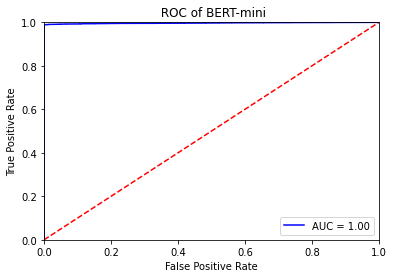

In [59]:
# Compute predicted probabilities on the validation set
probs = bert_predict(bert_classifier, val_dataloader)

# Evaluate the Bert classifier
evaluate_roc(probs, y_val, "BERT-mini")

In [60]:
# Run `preprocessing_for_bert` on the test set
print('Tokenizing data...')
test_inputs, test_masks = preprocessing_for_bert(X_test)

# Create the DataLoader for our test set
test_dataset = TensorDataset(test_inputs, test_masks)
test_sampler = SequentialSampler(test_dataset)
test_dataloader = DataLoader(test_dataset, sampler=test_sampler, batch_size=32)

Tokenizing data...


In [61]:
# Compute predicted probabilities on the test set
probs = bert_predict(bert_classifier, test_dataloader)

# Get predictions from the probabilities
threshold = 0.5
preds = np.where(probs[:, 1] > threshold, 1, 0)

# Number of tweets predicted non-negative
print("no-negative tweets ratio ", preds.sum()/len(preds))

no-negative tweets ratio  0.4867677132202574


AUC: 0.9958
Accuracy: 98.97%


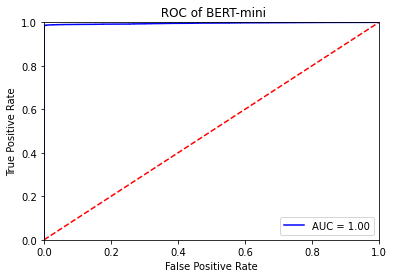

In [62]:
# Evaluate the Bert classifier for unseen test data
evaluate_roc(probs, y_test,"BERT-mini")

In [66]:
# Helper function to get the prediction of a single name
def predict_single_full_name(name):
    df = pd.DataFrame([name])
    df = df.rename(columns = {0:"name"})
    print(df.name.values)
    test_inputs, test_masks = preprocessing_for_bert(df.name.values)

    # Create the DataLoader for our test set
    test_dataset = TensorDataset(test_inputs, test_masks)
    test_sampler = SequentialSampler(test_dataset)
    test_dataloader = DataLoader(test_dataset, sampler=test_sampler, batch_size=32)

    # Compute predicted probabilities on the test set
    probs = bert_predict(bert_classifier, test_dataloader)
    print(probs)

    # Get predictions from the probabilities
    threshold = 0.5
    preds = np.where(probs[:, 1] > threshold, "The input name seems not correct", "The input name is correct")

#     print("no-negative ratio ", preds.sum()/len(preds))
    return preds

In [72]:
# lets check my name 
predict_single_full_name("عبدالله محمد امين")

['عبدالله محمد امين']
[[0.9956055  0.00439447]]


array(['The input name is correct'], dtype='<U32')

In [73]:
predict_single_full_name("عبدالله محماد امين")

['عبدالله محماد امين']
[[1.1399698e-05 9.9998856e-01]]


array(['The input name seems not correct'], dtype='<U32')

In [74]:
predict_single_full_name("عبدالله محمد اميهن")

['عبدالله محمد اميهن']
[[9.7134971e-06 9.9999034e-01]]


array(['The input name seems not correct'], dtype='<U32')

In [75]:
# lets check another name 
predict_single_full_name("علاء محمد صديق")

['علاء محمد صديق']
[[0.99453306 0.00546688]]


array(['The input name is correct'], dtype='<U32')

In [76]:
predict_single_full_name("علاء محمد صديقه")

['علاء محمد صديقه']
[[1.8628692e-05 9.9998140e-01]]


array(['The input name seems not correct'], dtype='<U32')